In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Loading and cleaning Dataset

In [2]:
df = pd.read_csv("updated_synthetic_apk_dataset.csv")
df.head(3)

,apk_size,dex_size,vercode,scan_date,activities_count,services_count,certificate_expired,suspicious_api_calls,sha256,markets,anomaly,pkg_name,sha1,md5,permissions_count,dangerous_permissions_count
0,10386469,4765888,121.0,15-06-2016 15:26,60,3,False,8,0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E2...,anzhi,0,com.zte.bamachaye,9C14D537A7ADB4CFC43D291352F73E05E0CCDD4A,3EDFC78AB53521942798AD551027D04F,27,4
1,3537486,3170096,16.0,20-11-2016 10:26,88,16,False,8,0000014A634DB98F85038B833A8DFC50D5FB13A464E0B2...,PlayDrone,0,com.tanersenel.onlinetvizle,C3EBEC52C9388BF67479FF1385A56C59B3E39E81,0A146750FB447CF3859C9CB659AB04F1,30,7
2,52469861,9201656,1206145.0,17-03-2021 08:02,59,3,False,3,000001A94F46A0C3DDA514E1F24E675648835BBA5EF3C3...,play.google.com,1,com.firstchoice.myfirstchoice,C0444D784685EFE5F6D9F28683B24B5873E509CB,EC82771AE018B93AD784A1FD2B625216,46,4


In [3]:
df.shape

(1048575, 16)

In [4]:
df.isnull().sum()

apk_size                           0
dex_size                           0
vercode                          135
scan_date                      12845
activities_count                   0
services_count                     0
certificate_expired                0
suspicious_api_calls               0
sha256                             0
markets                            0
anomaly                            0
pkg_name                           0
sha1                              16
md5                               16
permissions_count                  0
dangerous_permissions_count        0
dtype: int64

In [5]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100

0.07755763774646544

In [6]:
df.notnull().sum()

apk_size                       1048575
dex_size                       1048575
vercode                        1048440
scan_date                      1035730
activities_count               1048575
services_count                 1048575
certificate_expired            1048575
suspicious_api_calls           1048575
sha256                         1048575
markets                        1048575
anomaly                        1048575
pkg_name                       1048575
sha1                           1048559
md5                            1048559
permissions_count              1048575
dangerous_permissions_count    1048575
dtype: int64

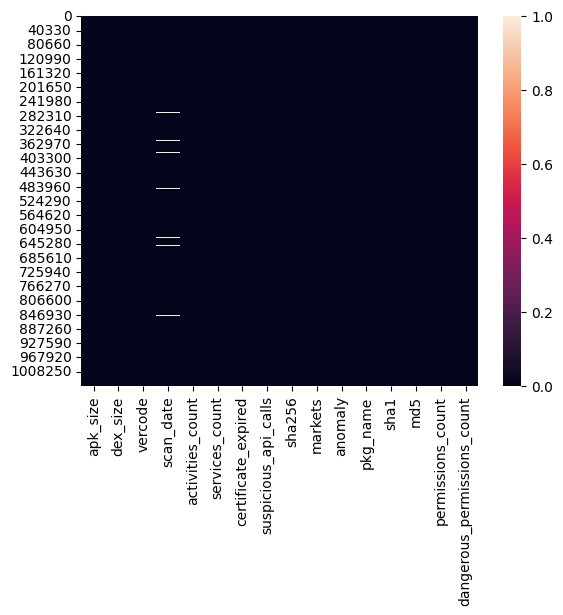

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   apk_size                     1048575 non-null  int64  
 1   dex_size                     1048575 non-null  int64  
 2   vercode                      1048440 non-null  float64
 3   scan_date                    1035730 non-null  object 
 4   activities_count             1048575 non-null  int64  
 5   services_count               1048575 non-null  int64  
 6   certificate_expired          1048575 non-null  bool   
 7   suspicious_api_calls         1048575 non-null  int64  
 8   sha256                       1048575 non-null  object 
 9   markets                      1048575 non-null  object 
 10  anomaly                      1048575 non-null  int64  
 11  pkg_name                     1048575 non-null  object 
 12  sha1                         1048559 non-n

In [9]:
df["scan_date"].fillna(df["scan_date"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_17192\3881227245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["scan_date"].fillna(df["scan_date"].mode()[0],inplace = True)


In [10]:
df.isnull().sum()

apk_size                         0
dex_size                         0
vercode                        135
scan_date                        0
activities_count                 0
services_count                   0
certificate_expired              0
suspicious_api_calls             0
sha256                           0
markets                          0
anomaly                          0
pkg_name                         0
sha1                            16
md5                             16
permissions_count                0
dangerous_permissions_count      0
dtype: int64

In [11]:
df["sha1"].fillna(df["sha1"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_17192\2406182722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sha1"].fillna(df["sha1"].mode()[0],inplace = True)


In [12]:
df["md5"].fillna(df["md5"].mode()[0],inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_17192\933395007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["md5"].fillna(df["md5"].mode()[0],inplace = True)


In [13]:
df.isnull().sum()

apk_size                         0
dex_size                         0
vercode                        135
scan_date                        0
activities_count                 0
services_count                   0
certificate_expired              0
suspicious_api_calls             0
sha256                           0
markets                          0
anomaly                          0
pkg_name                         0
sha1                             0
md5                              0
permissions_count                0
dangerous_permissions_count      0
dtype: int64

In [14]:
df.columns

Index(['apk_size', 'dex_size', 'vercode', 'scan_date', 'activities_count',
       'services_count', 'certificate_expired', 'suspicious_api_calls',
       'sha256', 'markets', 'anomaly', 'pkg_name', 'sha1', 'md5',
       'permissions_count', 'dangerous_permissions_count'],
      dtype='object')

In [16]:
# Handle date-like fields
reference_date = pd.Timestamp("1970-01-01")
df['scan_date'] = pd.to_datetime(df['scan_date'], errors='coerce')  # Convert to datetime
df['scan_date'] = (df['scan_date'] - reference_date).dt.days

C:\Users\karan\AppData\Local\Temp\ipykernel_17192\1801346434.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['scan_date'] = pd.to_datetime(df['scan_date'], errors='coerce')  # Convert to datetime


# Selecting features for anomaly detection

In [17]:
# Define features for training
features = [
    "apk_size", "dex_size", "vercode", "activities_count",
    "services_count", "suspicious_api_calls",
    "permissions_count", "dangerous_permissions_count", "scan_date"
]
X = df[features]
y = df["anomaly"]  # Target variable

In [18]:
# Exclude non-numeric columns
columns_to_exclude = ['sha256', 'sha1', 'md5', 'pkg_name', 'markets']
X = df.drop(columns=columns_to_exclude + ['anomaly'])  # Remove target column and non-numeric columns
y = df['anomaly']  # Target variable

# Handling missing values

In [19]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [20]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [21]:
# Impute missing values in X_scaled
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_scaled)

In [22]:
# Ensure data is valid
print("Shape of X_scaled:", X_scaled.shape)
print("Sample data in X_scaled:\n", X_scaled[:5])

Shape of X_scaled: (1048575, 10)
Sample data in X_scaled:
 [[-0.36661894 -0.34235796 -0.16171501 -1.23014351  0.35134869 -1.12861008
  -1.00011349  1.21732398  0.14056222 -0.17476618]
 [-0.59450735 -0.81030578 -0.16171542 -1.08158484  1.33147175  1.12715996
  -1.00011349  1.21732398  0.35268508  0.87093782]
 [ 1.03363532  0.95838044 -0.15704892  0.40212144  0.31634429 -1.12861008
  -1.00011349 -0.52228596  1.48400699 -0.17476618]
 [-0.56912367 -0.50504205 -0.16167679 -0.72617231  1.01643219 -0.60804776
  -1.00011349 -0.87020795 -1.62712827 -1.22047018]
 [-0.28102767  0.55132538 -0.1601674  -0.19117302  0.35134869 -0.78156854
   0.99988652  0.17355802 -0.49580635 -1.56903817]]


# Using isolation model

In [23]:
# Split the dataset for evaluation (optional)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

# predict anamoly 0 for normal and 1 for anomalous

In [25]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred == -1, 1, 0)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92    183554
           1       0.39      0.31      0.34     26161

    accuracy                           0.85    209715
   macro avg       0.64      0.62      0.63    209715
weighted avg       0.84      0.85      0.85    209715



# Confusion Matrix

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[170602  12952]
 [ 18051   8110]]


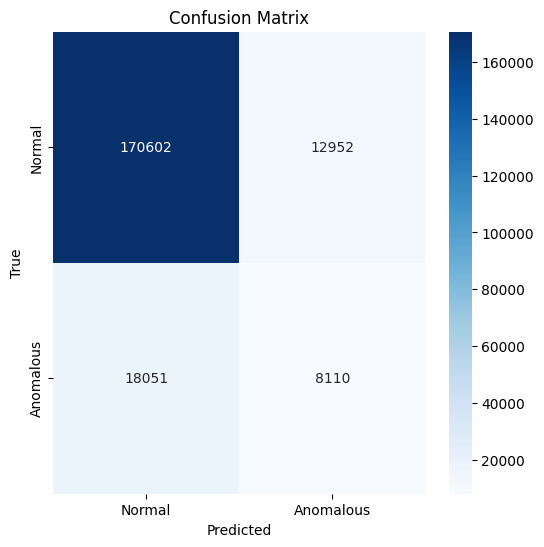

In [28]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Saving the model

In [29]:
# Save the trained model and scaler
joblib.dump(model, "anomaly_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(imputer, "imputer.pkl")

['imputer.pkl']